In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scripts.sim_data as sd

In [3]:
simulated_phenotype = sd.SimulatedDataset()

In [4]:
# get a data loader
data_loader = torch.utils.data.DataLoader(simulated_phenotype, batch_size=4, shuffle=True)

In [5]:
# show the first batch
for i, data in enumerate(data_loader):
    print(data[0].shape)
    break

torch.Size([4, 20000])


/tmp/ipykernel_35505/2819219255.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


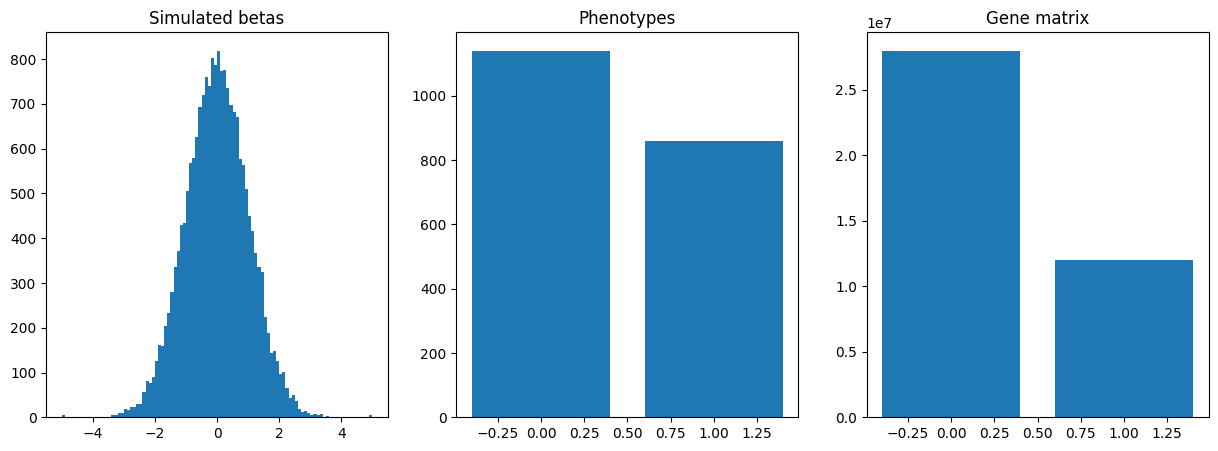

In [6]:
# visualise the beta distribution
def plot_simulated_phenotype(simulated_phenotype):
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
    ax[0].hist(simulated_phenotype.betas, bins=100)
    ax[0].set_title("Simulated betas")
    
    ax[1].bar(np.unique(simulated_phenotype.phenos), [np.sum(simulated_phenotype.phenos == 0), np.sum(simulated_phenotype.phenos == 1)])
    ax[1].set_title("Phenotypes")
    
    flat_g_matrix = simulated_phenotype.g_matrix.flatten()
    ax[2].bar(np.unique(flat_g_matrix), [np.sum(flat_g_matrix == 0), np.sum(flat_g_matrix == 1)])
    ax[2].set_title("Gene matrix")
    
    fig.show()
    
plot_simulated_phenotype(simulated_phenotype)